In [1]:
#!pip install --upgrade datasets

In [24]:
import numpy as np
import pandas as pd
import datasets
from datasets import load_dataset

In [25]:
# Both train and test
data_seq2type = load_dataset("GGLab/GECTurk")

In [26]:
data_seq2type

DatasetDict({
    train: Dataset({
        features: ['tokens', 'labels'],
        num_rows: 96919
    })
    dev: Dataset({
        features: ['tokens', 'labels'],
        num_rows: 20769
    })
    test: Dataset({
        features: ['tokens', 'labels'],
        num_rows: 20769
    })
    movie_reviews: Dataset({
        features: ['tokens', 'labels'],
        num_rows: 300
    })
})

In [27]:
from collections import defaultdict

def extract_stats(dataset):
    dct = defaultdict(set)
    for row_idx, row in enumerate(dataset):
        errorless=True
        for token_type in row["labels"]:
            if token_type!=0:
                errorless=False
                dct[token_type].add(row_idx)
                
        if errorless:
            dct[0].add(row_idx)
            
    return dict(dct)

In [28]:
train_stats_dct = extract_stats(data_seq2type["train"])
dev_stats_dct = extract_stats(data_seq2type["dev"])
test_stats_dct = extract_stats(data_seq2type["test"])
reviews_stats_dct = extract_stats(data_seq2type["movie_reviews"])

In [29]:
def get_stats(dct, slice_, print_=False):
    print("Slice:",slice_)
    stats = dict()
    
    for type_, indexes in sorted(dct.items()):
        stats[type_] = [len(indexes)]
        if print_:
            print("type:", type_, "num_samples:", len(indexes))
    
    return pd.DataFrame(stats)


In [30]:
train_slice = get_stats(train_stats_dct, "Train")
train_slice.head()

Slice: Train


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,48746,8592,72,66,330,7261,21875,1251,976,197,...,286,322,396,3,5110,38,2525,1828,583,193


In [31]:
dev_slice = get_stats(dev_stats_dct, "Dev")
dev_slice.head()

Slice: Dev


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,20,21,22,23,24,25
0,10506,1814,16,17,73,1545,4637,268,205,48,...,51,67,75,72,1088,7,570,413,98,41


In [32]:
test_slice = get_stats(test_stats_dct, "Test")
test_slice.head()

Slice: Test


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,10457,1835,13,16,69,1581,4627,280,169,59,...,61,62,72,1,1102,8,594,372,132,36


In [33]:
concated = pd.concat([train_slice,dev_slice,test_slice],axis=0)
concated.index = ["train", "dev", "test"]
concated.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
train,48746,8592,72,66,330,7261,21875,1251,976,197,...,286,322,396,3.0,5110,38,2525,1828,583,193
dev,10506,1814,16,17,73,1545,4637,268,205,48,...,67,75,72,NaN,1088,7,570,413,98,41
test,10457,1835,13,16,69,1581,4627,280,169,59,...,61,62,72,1.0,1102,8,594,372,132,36


In [34]:
train_slice.iloc[0,:].values

array([48746,  8592,    72,    66,   330,  7261, 21875,  1251,   976,
         197,   266,  3681,  8033,  1086,   605,   228,   286,   322,
         396,     3,  5110,    38,  2525,  1828,   583,   193])

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
num_samples_total = (concated.describe().loc["mean",:]*3)

In [36]:
num_samples_total.median()

827.5

In [37]:
num_samples_total

0     69709.0
1     12241.0
2       101.0
3        99.0
4       472.0
5     10387.0
6     31139.0
7      1799.0
8      1350.0
9       304.0
10      390.0
11     5235.0
12    11503.0
13     1531.0
14      842.0
15      327.0
16      414.0
17      459.0
18      540.0
19        6.0
20     7300.0
21       53.0
22     3689.0
23     2613.0
24      813.0
25      270.0
Name: mean, dtype: float64

In [38]:
print(num_samples_total<500)

0     False
1     False
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13    False
14    False
15     True
16     True
17     True
18    False
19     True
20    False
21     True
22    False
23    False
24    False
25     True
Name: mean, dtype: bool


In [39]:
#Type 0 and Type 6 are extremes
print(num_samples_total[1:].drop(6,axis=0).values)

[1.2241e+04 1.0100e+02 9.9000e+01 4.7200e+02 1.0387e+04 1.7990e+03
 1.3500e+03 3.0400e+02 3.9000e+02 5.2350e+03 1.1503e+04 1.5310e+03
 8.4200e+02 3.2700e+02 4.1400e+02 4.5900e+02 5.4000e+02 6.0000e+00
 7.3000e+03 5.3000e+01 3.6890e+03 2.6130e+03 8.1300e+02 2.7000e+02]


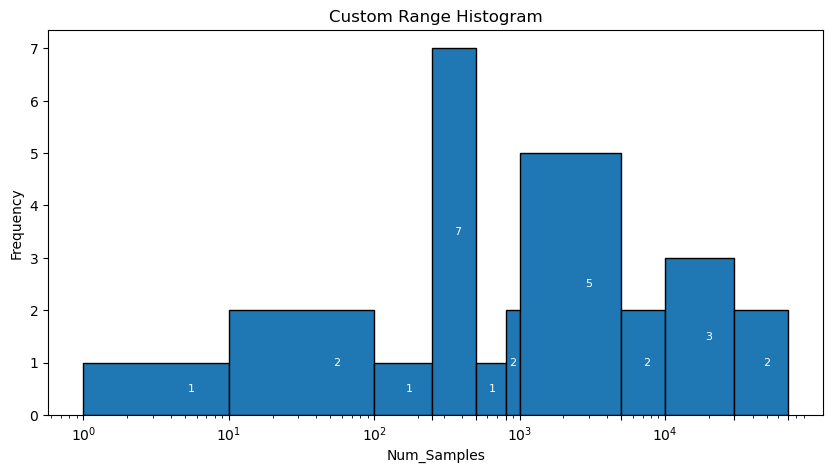

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data (random for demonstration)
np.random.seed(0)
hist_data = num_samples_total.values  # Gamma distribution for demonstration

# Define the bins as specified
bins = [1,10, 100, 250, 500, 800, 1000, 5000, 10000, 30000,70000]

# Create histogram
plt.figure(figsize=(10, 5))
counts, edges, patches = plt.hist(hist_data, bins=bins, edgecolor='black')

plt.xscale("log")
plt.xticks(bins)

# Add labels and titles
plt.xlabel('Num_Samples')
plt.ylabel('Frequency')
plt.title('Custom Range Histogram')

# Optional: Add text inside the plot for bin counts
for patch, count in zip(patches, counts):
    plt.text(patch.xy[0] + patch.get_width()/2, patch.get_height()/2, str(int(count)), 
             ha='center', va='center', color='white', fontsize=8)

plt.show()


In [41]:
def get_error_examples(type_, n_examples=3):
    indexes = np.array(list(train_stats_dct[type_]))
    n_examples = min(indexes.shape[0], n_examples)
    sample = np.random.choice(indexes, size=n_examples, replace=False)
    for i in sample:
        i = int(i)
        print(" ".join(data_seq2type["train"][i]["tokens"]),
              "\n",data_seq2type["train"][i]["labels"], "\n")


In [42]:
get_error_examples(4,4)

Gece sorumluluğu sırası Antepli Ökkeş Abi'deyse, ona uğramadan gider yada işe dalarsam surat yapıyor. 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0] 

Ancak, yemeğe misafir geleceği zaman durum farklıydı, annemiz sıkı sıkıya tembih ederdi, akşam eve misafir gelecek, babanız çarşı ekmeği alsın yada göndersin. 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0] 

Bir zamanlar sosyalizmi nasıl mümkün kılarızı konuşurken yada onun için savaşırken şimdi bakmışsınız, siz başka adlar taksanızda, uluslar arası sermayenin/otantik sermayenin iktidarını sürdürmesi için gecelerini gündüzlerine katıyorlar. 
 [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Bu bilgileri Fransız siyasetçileri yada meslektaşları mat etmek için toplamıyorum... 
 [0, 0, 0, 0, 4, 0, 0, 0, 0, 0] 



In [21]:
num_samples_total

0     69709.0
1     12241.0
2       101.0
3        99.0
4       472.0
5     10387.0
6     31139.0
7      1799.0
8      1350.0
9       304.0
10      390.0
11     5235.0
12    11503.0
13     1531.0
14      842.0
15      327.0
16      414.0
17      459.0
18      540.0
19        6.0
20     7300.0
21       53.0
22     3689.0
23     2613.0
24      813.0
25      270.0
Name: mean, dtype: float64

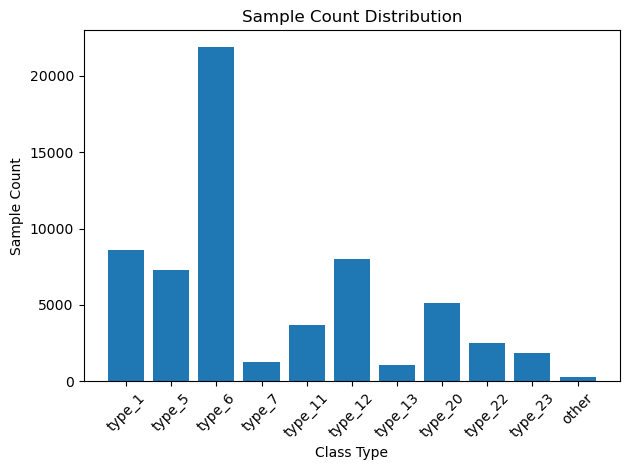

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample counts
counts = np.array([0, 8592, 72, 66, 330, 7261, 21875, 1251, 976, 197, 266, 3681, 8033, 1086, 605, 228, 286, 322, 396, 3, 5110, 38, 2525, 1828, 583, 193])

# Threshold for merging classes
threshold = 1000

# Separate classes above and below the threshold
above_threshold_counts = counts[counts >= threshold]
below_threshold_counts = counts[counts < threshold]

# Create bin labels for classes above the threshold
above_threshold_labels = ["type_" + str(i) for i in [1,5,6,7,11,12,13,20,22,23]]

# Check if there are any classes below the threshold
if len(below_threshold_counts) > 0:
  # Calculate the average count for classes below the threshold
  average_count = np.mean(below_threshold_counts)
  # Create a bin label for the merged class
  below_threshold_label = "other"
  # Combine labels and counts
  labels = np.concatenate((above_threshold_labels, [below_threshold_label]))
  counts = np.concatenate((above_threshold_counts, [average_count]))
else:
  # No classes below the threshold, use original labels and counts
  labels = ["type_" + str(i) for i in range(len(counts))]
  counts = counts

# Create the histogram
plt.bar(labels, counts)
plt.xlabel("Class Type")
plt.ylabel("Sample Count")
plt.title("Sample Count Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (3,).

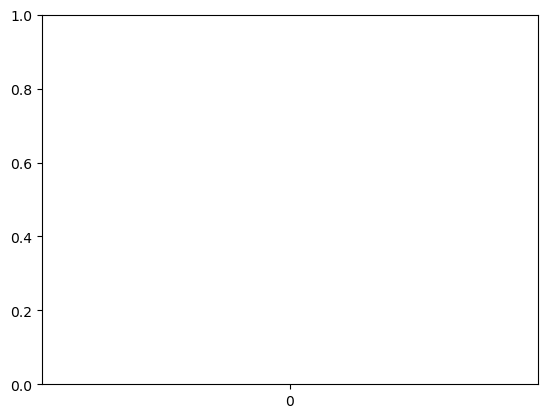

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Sample counts
counts = np.array([7500, 1000, 250, 250, 500, 250, 1000, 1000, 1000, 
                   250, 500, 1000, 500, 500, 500, 500, 500, 500, 500, 250, 500, 135, 1000, 1000, 0, 250])
counts = np.array([7500,1000,500,250])
# Threshold for merging classes
threshold = 1000

# Separate classes above and below the threshold
above_threshold_counts = counts[counts >= threshold]
below_threshold_counts = counts[counts < threshold]

# Create bin labels for classes above the threshold
above_threshold_labels = ["0","1,6,7,8,11,22,23","4,10,12-18,20","2,3,5,9,19,25"]

# Check if there are any classes below the threshold
if len(below_threshold_counts) > 0:
  # Calculate the average count for classes below the threshold
  average_count = np.mean(below_threshold_counts)
  # Create a bin label for the merged class
  below_threshold_label = "other"
  # Combine labels and counts
  labels = np.concatenate((above_threshold_labels, [below_threshold_label]))
  counts = np.concatenate((above_threshold_counts, [average_count]))
else:
  # No classes below the threshold, use original labels and counts
  labels = ["type_" + str(i) for i in range(len(counts))]
  counts = counts

# Create the histogram
plt.bar(labels, counts)
plt.xlabel("Class Type")
plt.ylabel("Sample Count")
plt.title("Sample Count Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

